# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
mice_count = len(list(mouse_study_results["Mouse ID"].value_counts()))
mice_count 


249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_results.loc[mouse_study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mouse_study_results.loc[mouse_study_results["Mouse ID"] == "g989",:]
dup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_results.drop(mouse_study_results[mouse_study_results['Mouse ID'] == "g989"].index, inplace = False)
print(clean_df)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [30]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(list(clean_df["Mouse ID"].value_counts()))
clean_mice_count 


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
study_mean= mouse_study_results.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
study_median = mouse_study_results.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
study_var = mouse_study_results.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
study_SD = mouse_study_results.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
study_SEM = mouse_study_results.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

tumor_df = pd.DataFrame({"Mean Tumor Volume": study_mean, "Median Tumor Volume": study_median, "Tumor Variance": study_var, "Tumor SD": study_SD, "Tumor SEM": study_SEM})

tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor SD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mice_tumor_df_agg = mouse_study_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
mice_tumor_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice Per Treatment')

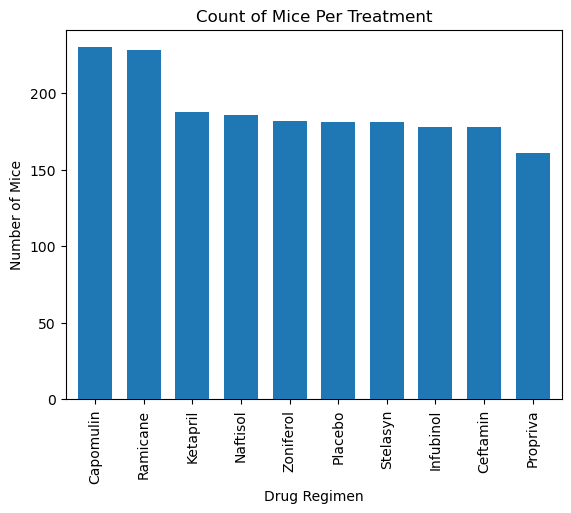

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = mouse_study_results['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Count of Mice Per Treatment")


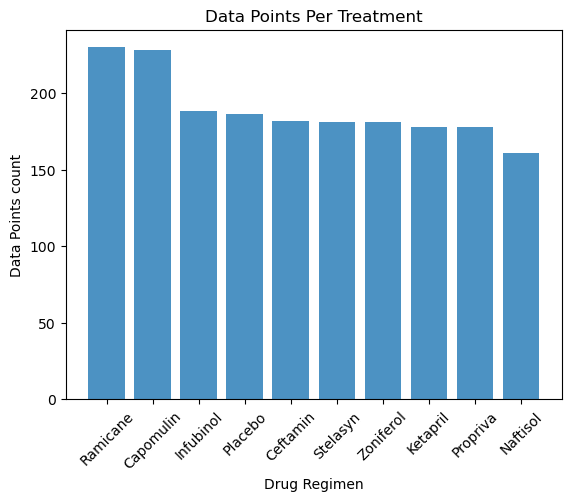

In [6]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_results['Drug Regimen'].unique()
y_axis = mouse_study_results['Drug Regimen'].value_counts()

#plotting
plt.bar(x_axis, y_axis, alpha=0.8, align='center')
plt.xticks(rotation=45)

#labels
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points count")
plt.title('Data Points Per Treatment')

plt.show()

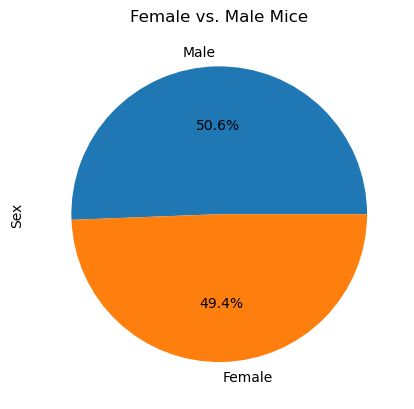

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = mouse_study_results["Sex"].value_counts()
plt.title("Female vs. Male Mice")
mouse_gender.plot.pie(autopct= "%1.1f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x1feb7c5be20>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

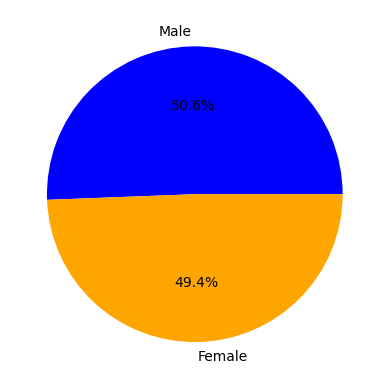

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['Blue', 'Orange']
plt.pie(mouse_study_results['Sex'].value_counts(), labels=mouse_study_results['Sex'].unique(), colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_mouse_tumor=clean_df.groupby('Mouse ID')['Tumor Volume (mm3)'].max()

# Start by getting the last (greatest) timepoint for each mouse
max_mouse_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_df = pd.merge(max_mouse_timepoint, clean_df, on=(["Mouse ID","Timepoint"]))

clean_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
tx = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for t in tx:
    tumor_volume = clean_df.loc[clean_df["Drug Regimen"] == t, 'Tumor Volume (mm3)']
    # tumor_vol= tx_regimen['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = clean_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_tumor = clean_df.loc[(clean_df['Tumor Volume (mm3)'] < lower_bound) | (clean_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {t} treatments is: {lowerq}")
    print(f"The upper quartile of {t} treatments is: {upperq}")
    print(f"The interquartile range of {t} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {t} outliers.")
    print(f"Values above {upper_bound} could be {t} outliers.")
    print(f"------------------------------------------------------------")


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 45.8758668475
The upper quartile of Capomulin treatments is: 65.05362410500001
The interquartile range of Capomulin treatments is: 19.177757257500012
Values below 17.10923096124998 could be Capomulin outliers.
Values above 93.82025999125003 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 45.8758668475
The upper quartile of Ramicane treatments is: 65.05362410500001
The interquartile range of Ramicane treatments is: 19.177757257500012
Values below 17.10923096124998 could be Ramicane outliers.
Values above 93.82025999125003 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 45.8758668475
The u

{'whiskers': [<matplotlib.lines.Line2D at 0x1febb411630>,
 'caps': [<matplotlib.lines.Line2D at 0x1febb4107f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1febb411360>,
 'medians': [<matplotlib.lines.Line2D at 0x1febb4104c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1febb412a70>,
 'means': []}

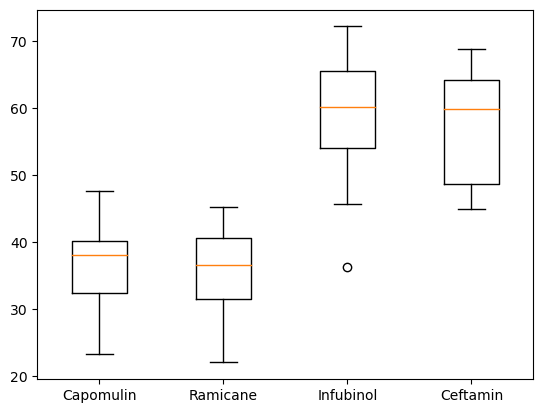

In [90]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = tx) 


## Line and Scatter Plots

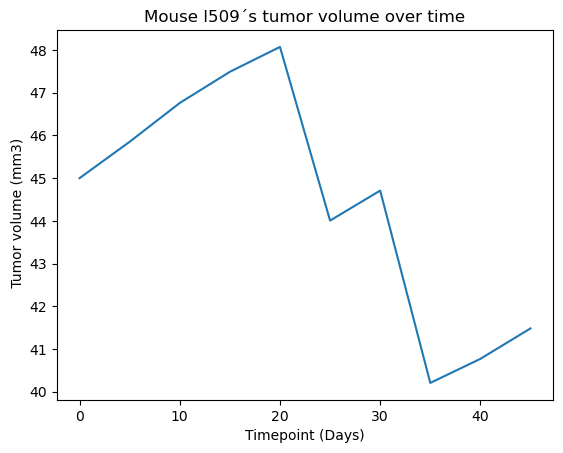

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#finding a mouse treated with Capomulin
capomulin_df = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin"]

#pulling specifically just Mouse 1509
Mouse_1509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]

# getting timepoint and tumor vol data for mouse 1509
plt.plot(Mouse_1509["Timepoint"],Mouse_1509["Tumor Volume (mm3)"] )

plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")


plt.show()

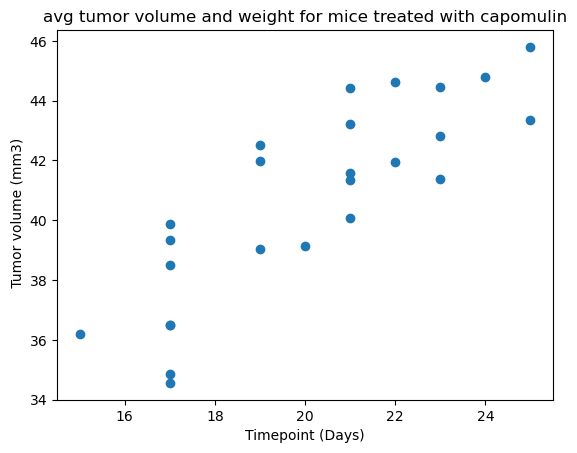

In [121]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#creating avg volume for capomulin mice
avg_volume =capomulin_df.groupby(['Mouse ID']).mean()

#creating graph
plt.scatter(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])

#adding labels
plt.title("avg tumor volume and weight for mice treated with capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")


plt.show()



## Correlation and Regression

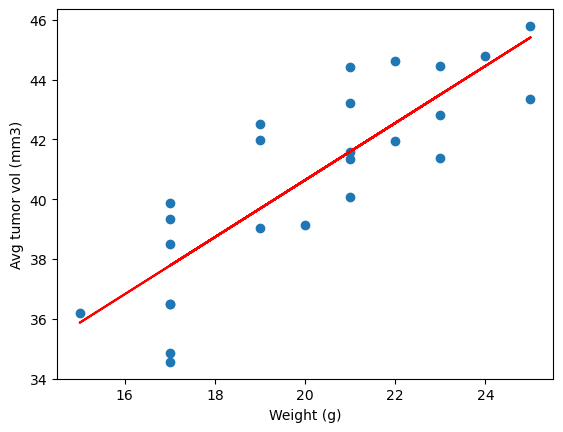

In [115]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate correlation coefficient 
correlation = st.pearsonr(avg_volume['Weight (g)'],avg_volume['Tumor Volume (mm3)'])

#creating x and y values for weight and tumor vol for Capomulin mice
x_values = avg_volume['Weight (g)']
y_values = avg_volume['Tumor Volume (mm3)']

#creating values for line 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

#creating regression values
regress_values = x_values * slope + intercept #List of predicted y values

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

#naming graph labels
plt.annotate(line_eq,(6,10),fontsize=15,color="red") #add in regression equation
plt.xlabel('Weight (g)')
plt.ylabel('Avg tumor vol (mm3)')
plt.show()
